# Logistic regression
This file contains code that helps you get started on 
logistic regression. You will need to complete the functions 
in logistic_regressor.py and utils.py in the places indicated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
import utils
from logistic_regressor import LogisticRegressor

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Unregularized logistic regression

In [ ]:
X = np.array([x for x in range()])

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


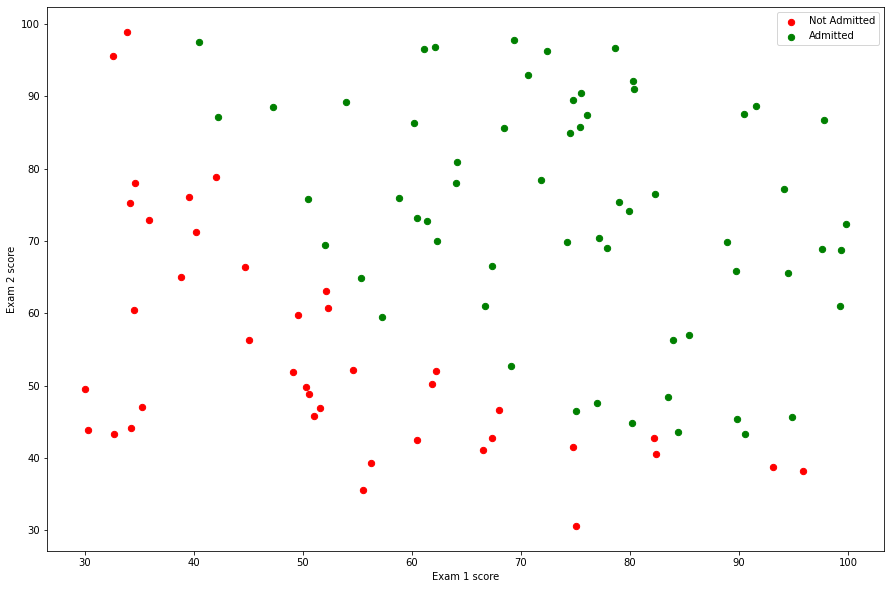

In [2]:
##================ Part 0: Reading data and plotting ==================#

data = pd.read_csv('ex1data1.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

In [3]:
np.array(data.x1[:5])

array([34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605])

In [4]:
##================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement loss and gradient of loss 

# set up the X matrix with the column of ones as intercept

XX = np.vstack([np.ones((X.shape[0],)),X.T]).T

# set up a logistic regression model

log_reg1 = LogisticRegressor()

# test the loss and gradient function

theta = np.zeros((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y)
print("Loss on all-zeros theta vector (should be around 0.693) = %.4f"  %loss)
grad = log_reg1.grad_loss(theta,XX,y)
print("Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) = %s" %grad)

# run fmin on the loss function and gradient 

theta_opt = log_reg1.train(XX,y,num_iters=1000)

# print the theta found
print('Theta found by fmin_bfgs: %s' %theta_opt)
log_reg1.theta = theta_opt
print("Final loss = %.4f" %log_reg1.loss(theta_opt,XX,y))


Loss on all-zeros theta vector (should be around 0.693) = 0.6931
Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) = [ -0.1        -12.00921659 -11.26284221]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Theta found by fmin_bfgs: [-25.16056945   0.20622963   0.20146073]
Final loss = 0.2035


In [5]:
##================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement loss and gradient of loss 

# set up the X matrix with the column of ones as intercept

XX = np.vstack([np.ones((X.shape[0],)),X.T]).T

# set up a logistic regression model

log_reg1 = LogisticRegressor()

# test the loss and gradient function

theta = np.zeros((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y)
print("Loss on all-zeros theta vector (should be around 0.693) = %.4f"  %loss)
grad = log_reg1.grad_loss(theta,XX,y)
print("Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) = %s" %grad)

# run fmin on the loss function and gradient 

theta_opt = log_reg1.train(XX,y,num_iters=400)

# print the theta found
print('Theta found by fmin_bfgs: %s' %theta_opt)
log_reg1.theta = theta_opt
print("Final loss = %.4f" %log_reg1.loss(theta_opt,XX,y))


Loss on all-zeros theta vector (should be around 0.693) = 0.6931
Gradient of loss wrt all-zeros theta vector (should be around [-0.1, -12.01, -11.26]) = [ -0.1        -12.00921659 -11.26284221]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Theta found by fmin_bfgs: [-25.16056945   0.20622963   0.20146073]
Final loss = 0.2035


# Predicting with a logistic regression model

In [8]:
# complete the method predict in logistic_regressor.py

# TODO: calculate the probability of a student being admitted with score of 45,85
#       replace pred_prob = 0 with pred_prob = expression for that probability

X_pred = np.array([1.0,45.0,85.0])
pred_prob = log_reg1.predict(X_pred)
print("For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = %.4f" %pred_prob)

# compute accuracy on the training set

predy = log_reg1.predict(XX)
map_func = lambda x : 1 if x >0.5 else 0
predy = np.array([map_func(x) for x in predy])
# TODO: calculate the accuracy of predictions on training set (hint: compare predy and y)

num_correct = np.sum(y == predy)
accuracy = float(num_correct) / y.shape[0]
print("Accuracy on the training set = %.4f" %accuracy)

For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = 0.7762
Accuracy on the training set = 0.8900


# Visualizing the decision boundary

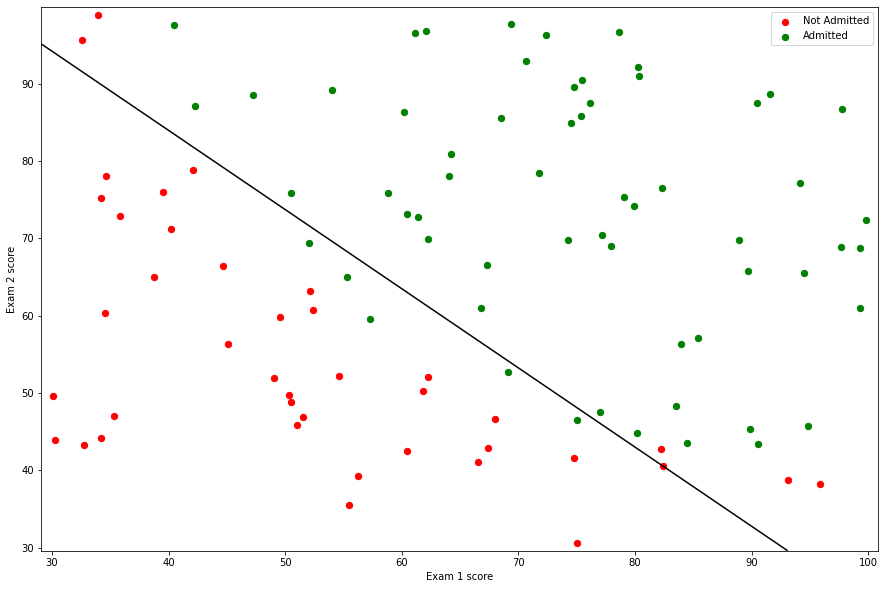

Theta found by sklearn: [[-25.15293066   0.20616459   0.20140349]]


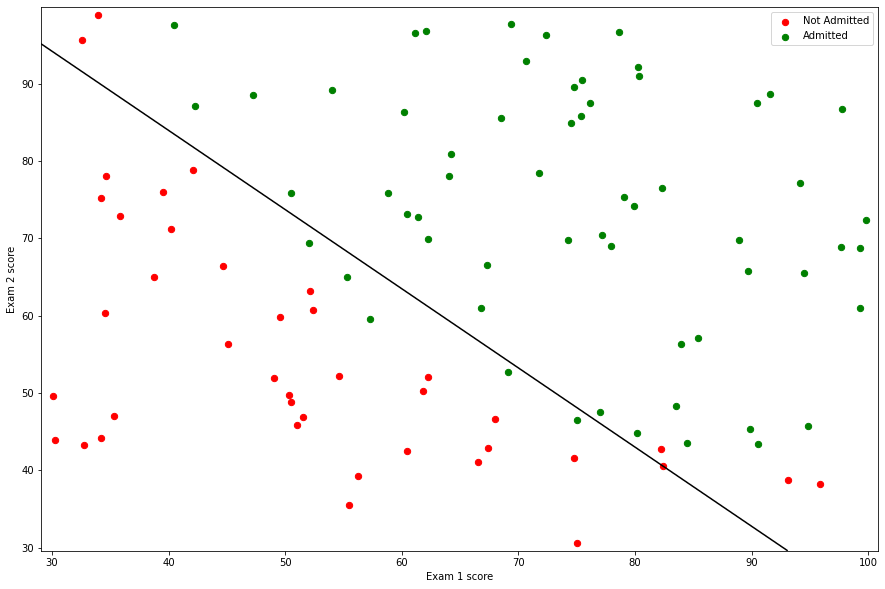

In [9]:
# plot the decision surface

plot_utils.plot_decision_boundary(X,y,theta_opt,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

# Compare with sklearn logistic regression
# note the parameters fed into the LogisticRegression call

from sklearn import linear_model
sk_logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',fit_intercept=False)
sk_logreg.fit(XX,y)
print("Theta found by sklearn: %s" %sk_logreg.coef_)

plot_utils.plot_decision_boundary_sklearn(X,y,sk_logreg,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

In [1]:
%run -i "grader.py"

========== START GRADING
----- START PART 4A1
----- END PART 4A1 [took 0:00:00.000079, 5/5 points]
----- START PART 4A2.1
----- END PART 4A2.1 [took 0:00:00.013898, 3/3 points]
----- START PART 4A2.2
----- END PART 4A2.2 [took 0:00:00.000684, 2/2 points]
----- START PART 4A3
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
----- END PART 4A3 [took 0:00:00.016286, 5/5 points]
----- START PART 4B1.1
----- END PART 4B1.1 [took 0:00:00.000361, 5/5 points]
----- START PART 4B1.2
----- END PART 4B1.2 [took 0:00:00.000384, 5/5 points]
----- START PART 4B2
         Current function value: nan
         Iterations: 1
         Function evaluations: 21
         Gradient evaluations: 21
----- END PART 4B2 [took 0:00:00.015465, 2/2 points]
----- START PART 4C1_1
----- END PART 4C1_1 [took 0:00:00.000041, 1/1 points]
----- START PART 4C1_2
----- END PART 4C1_2 [took 0:00:00.00005

/Users/kael/Documents/GitHub/Statistic-Machine-Learning/hw2/logreg/logistic_regressor.py:217: RuntimeWarning: divide by zero encountered in log
  J = 1/m * np.sum(-np.matmul(y,np.log(utils.sigmoid(z))) - np.matmul((1-y),np.log(1-utils.sigmoid(z)))) + reg/m/2*np.sum(np.square(theta[1:]))
/Users/kael/Documents/GitHub/Statistic-Machine-Learning/hw2/logreg/logistic_regressor.py:217: RuntimeWarning: divide by zero encountered in log
  J = 1/m * np.sum(-np.matmul(y,np.log(utils.sigmoid(z))) - np.matmul((1-y),np.log(1-utils.sigmoid(z)))) + reg/m/2*np.sum(np.square(theta[1:]))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

----- END PART 4C2 [took 0:00:07.935046, 8/8 points]
========== END GRADING [37/37 points]
grader-manual.out already exists
Total max points: 45
